The **classification folder** serves as a directory specifically dedicated to holding data for inference.
The **chinar, mango and pomegranate folders** serves as a directory specifically dedicated to holding data for training.


Folders in '/content/leafs': ['.ipynb_checkpoints', 'chinar', 'pomegranate', 'mango']
Found 192 images belonging to 3 classes.
Found 48 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4009 - loss: 1.1180 - val_accuracy: 0.3333 - val_loss: 1.0505
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4968 - loss: 0.9163 - val_accuracy: 0.8750 - val_loss: 0.5696
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8351 - loss: 0.5279 - val_accuracy: 0.6250 - val_loss: 0.7424
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7421 - loss: 0.5422 - val_accuracy: 0.9167 - val_loss: 0.2379
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9433 - loss: 0.1595 - val_accuracy: 0.8750 - val_loss: 0.3580
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8617 - loss: 0.3195 - val_accuracy: 0.8542 - val_loss: 0.2115
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9608 - loss: 0.1694 - val_accuracy: 0.8958 - val_loss: 0.2186
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8747 - loss: 0.3260 - val_accuracy: 0.9583 - val_loss: 0.1457
Epo

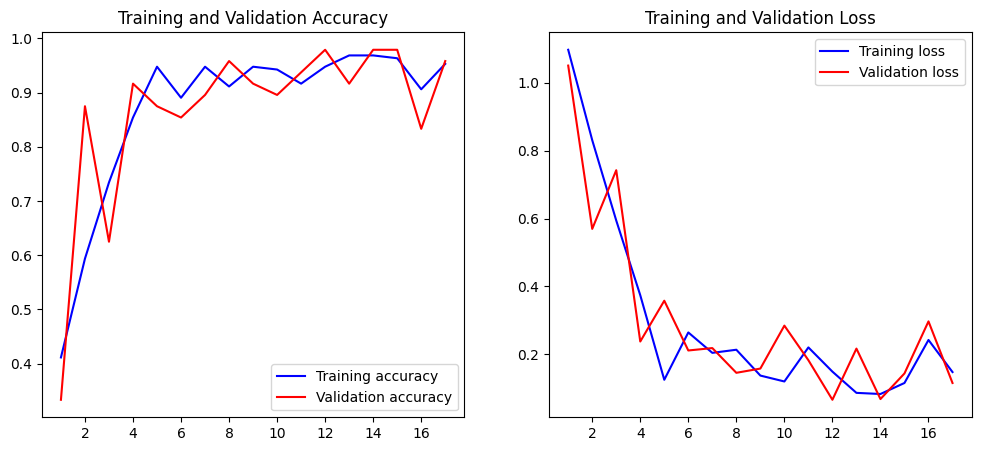

In [ ]:
#Data Source= https://data.mendeley.com/datasets/hb74ynkjcn/1
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import os

data_dir = '/content/leafs'

print("Folders in '/content/leafs':", os.listdir(data_dir))

# Image data generator with augmentation to handle different angles
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load the images with specified classes
train_data = datagen.flow_from_directory(
    directory=data_dir,
    classes=['chinar', 'mango', 'pomegranate'],
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    directory=data_dir,
    classes=['chinar', 'mango', 'pomegranate'],
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# Define a CNN model with dropout and reduced dense layer size
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu')
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(3, activation='softmax')
])

# Initialising learning rate
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overtraining
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Train the model with early stopping and learning rate decay
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data,
    callbacks=[early_stopping]
)

model.save("Optimized_Leaf_Model.h5")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

Predictions for 0009_0089.JPG:
- Chinar: 0.00%
- Mango: 0.12%
- Pomegranate: 99.88%
Most likely: Pomegranate (99.88%) - High Confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Predictions for 0001_0083.JPG:
- Chinar: 38.47%
- Mango: 61.48%
- Pomegranate: 0.05%
Most likely: Mango (61.48%) - Less Confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Predictions for 0011_0094.JPG:
- Chinar: 95.20%
- Mango: 4.80%
- Pomegranate: 0.00%
Most likely: Chinar (95.20%) - High Confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Predictions for 0009_0096.JPG:
- Chinar: 0.00%
- Mango: 2.10%
- Pomegranate: 97.90%
Most likely: Pomegranate (97.90%) - High Confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Predictions for 0001_0087.JPG:
- Chinar: 0.40%
- Mango: 99.59%
- Pomegranate: 0.01%
Most likely: Mango (99.59%) - High Confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Predictions for 0011_0084.JPG:
- Chinar: 98.77%
- Mango: 1.23%
- Pomegranate: 0.00%
Most likely: Chin

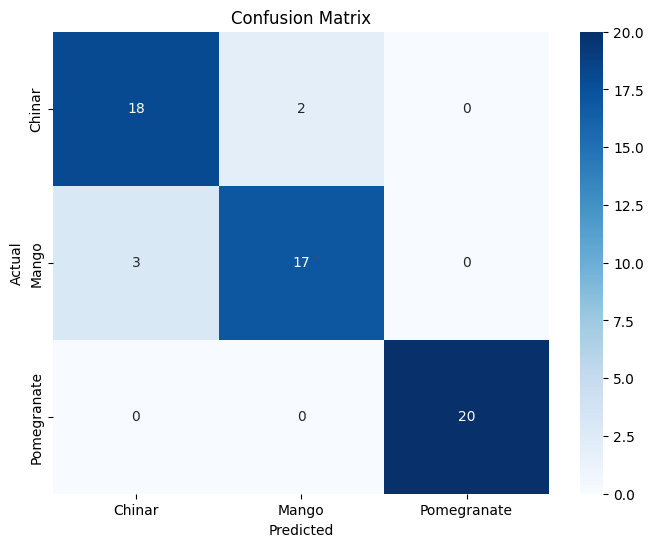


Classification Report:
              precision    recall  f1-score   support

      Chinar       0.86      0.90      0.88        20
       Mango       0.89      0.85      0.87        20
 Pomegranate       1.00      1.00      1.00        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

model_path = "Optimized_Leaf_Model.h5"
classification_folder = "/content/classification"
img_width, img_height = 150, 150  # Image size used in training

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Class names (make sure these match the classes used in training)
class_names = ["Chinar", "Mango", "Pomegranate"]

def classify_image(image_path):
    """Classify a single image and return prediction probabilities for each class."""
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and add batch dimension

    # Predict the class
    predictions = model.predict(img_array)[0]
    return predictions

# Initialize lists to hold predictions and actual labels for confusion matrix
y_true = []  # Actual labels for calculating confusion matrix
y_pred = []  # Predicted labels

# Inference and confidence categorization
for image_file in os.listdir(classification_folder):
    image_path = os.path.join(classification_folder, image_file)
    if os.path.isfile(image_path):  # Ensure it's a file
        predictions = classify_image(image_path)

        # Print probabilities for each class
        print(f"\nPredictions for {image_file}:")
        for idx, class_name in enumerate(class_names):
            print(f"- {class_name}: {predictions[idx] * 100:.2f}%")

        # Determine the most likely class and categorize confidence level
        most_likely_idx = np.argmax(predictions)
        most_likely_class = class_names[most_likely_idx]
        most_likely_prob = predictions[most_likely_idx] * 100

        # Confidence categorization
        if most_likely_prob >= 85:
            confidence_level = "High Confidence"
        elif most_likely_prob >= 65:
            confidence_level = "Confidence"
        else:
            confidence_level = "Less Confidence"

        print(f"Most likely: {most_likely_class} ({most_likely_prob:.2f}%) - {confidence_level}")

        # Append for confusion matrix
        if image_file.startswith("0011"):
            y_true.append(0)  # Chinar
        elif image_file.startswith("0001"):
            y_true.append(1)  # Mango
        elif image_file.startswith("0009"):
            y_true.append(2)  # Pomegranate
        y_pred.append(most_likely_idx)  # Predicted class index

# Generate Confusion Matrix and Classification Report
if y_true:  # Only if actual labels are available
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Display classification report for additional metrics
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
else:
    print("\nActual labels not provided, skipping confusion matrix and classification report.")
